In [1]:
import numpy as np
import pandas as pd
import os

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import seaborn as sns
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential, Input, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import os
from tqdm import tqdm
import pandas as pd

In [ ]:
disease_types=['COVID', 'OTHERS','Pneumonia'] #differentiating the disease types, folders' names will be based on this
data_dir = '/content/drive/My Drive/Final_Test/'
train_dir = os.path.join(data_dir)

In [ ]:
train_data = []
for defects_id, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])
        
        
train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
train.head()

FileNotFoundError: ignored

In [ ]:
SEED = 42
#train = train.sample(frac=1, random_state=SEED) 
#train.index = np.arange(len(train)) # Reset indices
train.head()

,File,DiseaseID,Disease Type
0,COVID/0036.png,0,COVID
1,COVID/0038.png,0,COVID
2,COVID/0039.png,0,COVID
3,COVID/0035.png,0,COVID
4,COVID/0037.png,0,COVID


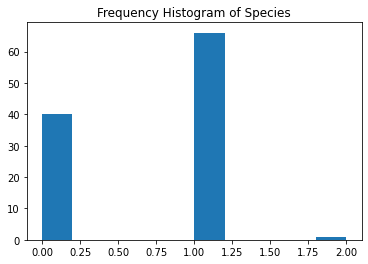

<Figure size 864x864 with 0 Axes>

In [ ]:
plt.hist(train['DiseaseID'])
plt.title('Frequency Histogram of Species')
plt.figure(figsize=(12, 12))
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model_1 = load_model('/content/drive/My Drive/Segmentation_UNET_7_deff_UNet.h5')
#model_2=  load_model('/content/drive/My Drive/Segmentation_UNET_4.h5')
#model_3=  load_model('/content/drive/My Drive/Segmentation_UNET_7_FCN8.h5')

IMAGE_SIZE = 128 
def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath)) # Loading a color image is the default flag
# Resize image to target size
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

In [ ]:
X_train = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
for i, file in tqdm(enumerate(train['File'].values)):
    image = read_image(file)
    #print(i,file)
    if image is not None:
        X_train[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))

        #X_train[i] = segment_ROI(X_train[i])
# Normalize the data 
#X_Train = X_train / 255. 
print('Train Shape: {}'.format(X_train.shape))

107it [00:47,  2.27it/s]

Train Shape: (107, 128, 128, 3)


In [ ]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray
    

In [ ]:
def mask_gen(Input_size,a,b):
    
    
  

    x1=64-int(a/2)
    y1=64-int(b/2)
    x2=64+int(a/2)
    y2=64-int(b/2)
  
  
    test_1=np.zeros((Input_size,Input_size))


    for i in range(a):
        
        for j in range(b):
            
        
            test_1[i+x1,j+y1]=1
    
    return test_1


In [ ]:
binary_mask_1=mask_gen(128,5,5)
binary_mask_2=mask_gen(128,10,10)
binary_mask_3=mask_gen(128,50,50)
binary_mask_4=mask_gen(128,80,80)
binary_mask_5=mask_gen(128,100,100)

In [ ]:
score_1=[]
score_2=[]
score_3=[]
score_4=[]
score_5=[]
Trash_X=[]

In [ ]:
Y_train = train['DiseaseID'].values
print(len(Y_train))
Y_train = to_categorical(Y_train, num_classes=3)
#print(Y_train)

107


In [ ]:
X_Train=X_train/127.5-1
#Y_tr

X_Train_Segmented=model_1.predict(X_Train)
X_Train_Final_ = np.argmax(X_Train_Segmented, axis=3)
Final_X=np.zeros((X_Train_Final_.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
Y_train_F=np.zeros(X_Train_Final_.shape[0])
#print(X_Train_Final_.shape)

for i in range(X_train.shape[0]):
  X_test_1=X_train[i]
  y_pred = X_Train_Final_[i]
  

  #plt.imshow(X_test_1)
  #temp_1=y_pred*X_test_1
  temp_1=y_pred*X_train[i,:,:,0]
  temp_2=y_pred*X_train[i,:,:,1]
  temp_3=y_pred*X_train[i,:,:,2]
  #plt.imshow(y_predi[398],cmap='gray')
  #dim = np.zeros((128,128))
  R = np.stack((temp_1,temp_2, temp_3), axis=2)
 
  Final_X[i]=R

 





print(Final_X.shape)
print(Y_train.shape)
Final_X=Final_X/255.

(107, 128, 128, 3)
(107, 3)


In [ ]:
Y_train.shape
#Don't Run

(184, 3)

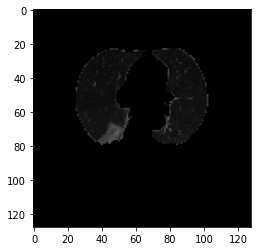

In [ ]:
plt.imshow(Final_X[0].astype('uint8'))
#Don't Run

In [ ]:
test_m=rgb2gray(Final_X[0])
#Don't Run

IndexError: ignored

In [ ]:
ret, bw_img = cv2.threshold(test_m,0,255,cv2.THRESH_BINARY)
bw_img=bw_img/255.
#Don't Run

0.0

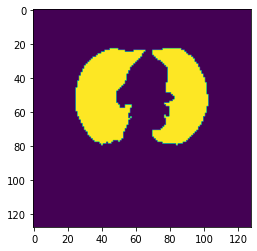

In [ ]:
plt.imshow(bw_img)

bw_img[100,40]

#Don't Run


In [ ]:
np.sum(bw_img*binary_mask_3)
#Don't Run

2596.0

In [ ]:
# Create the basic mask
mask = np.ones(shape=bw_img.shape, dtype="bool")
#Don't Run


In [ ]:
import skimage
from skimage.viewer import ImageViewer
import numpy as np
#Don't Run

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Viewer requires Qt
  


In [ ]:
# Draw filled rectangle on the mask image
rr, cc = skimage.draw.rectangle(start=(60,40), end=(100, 100))
mask[rr, cc] =False
#Don't Run

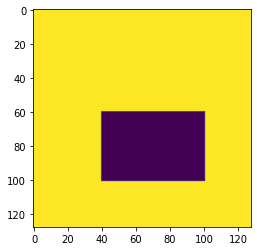

In [ ]:
plt.imshow(mask.astype('uint8'))
#Don't Run

In [ ]:
mask[0,0]
#Don't Run

True

IndexError: ignored

In [ ]:
binary_mask_1=mask_gen(128,5,5)
binary_mask_2=mask_gen(128,10,10)
binary_mask_3=mask_gen(128,50,50)
binary_mask_4=mask_gen(128,80,80)
binary_mask_5=mask_gen(128,100,100)

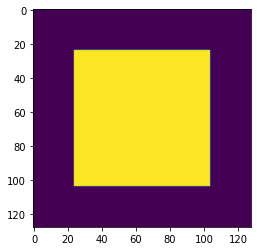

In [ ]:
plt.imshow(binary_mask_4.astype('uint8'))
#Don't Run

In [ ]:
binary_mask[0,0]
#Don't Run

0.0

In [ ]:
score_1=np.sum(bw_img*binary_mask)
#Don't Run

In [ ]:
score_1
#Don't Run

813.0

In [ ]:
score_1=[]
score_2=[]
score_3=[]
score_4=[]
score_5=[]
Trash_X=[]
j=0
for i in range(X_train.shape[0]):
  test_m=rgb2gray(Final_X[i])
  ret, bw_img = cv2.threshold(test_m,0,255,cv2.THRESH_BINARY)
  bw_img=bw_img/255.
  score_1.append(np.sum(bw_img*binary_mask_1))
  score_2.append(np.sum(bw_img*binary_mask_2))
  score_3.append(np.sum(bw_img*binary_mask_3))
  score_4.append(np.sum(bw_img*binary_mask_4))
  score_5.append(np.sum(bw_img*binary_mask_5))
  
  if (np.sum(bw_img*binary_mask_2)>0 and np.sum(bw_img*binary_mask_2)<20 ) and (np.sum(bw_img*binary_mask_4)>0 and np.sum(bw_img*binary_mask_4)<200) :
    Trash_X.append(i)
    print(i,j)
    #test=Final_X[i]
    Final_X[i],Final_X[j]=Final_X[j],Final_X[i]
    
    Y_train[i],Y_train[j]=Y_train[j],Y_train[i]
    j+=1
    
#plt.imshow(Final_X[6360])
    

#print(Final_X.shape)
#print(Trash_X.shape)

#type(Trash_X)

2 0
99 1
104 2


In [ ]:
#Right side
Final_X=Final_X[3:109,:,:,:]

#X=X[i+1:number of images,:,:,:]
Y_train=Y_train[3:109,:]

print(Final_X.shape)
print(Y_train.shape)

(104, 128, 128, 3)
(104, 3)


In [ ]:
print(Final_X.shape)
#print(len(Y_train))

#plt.imshow(Final_X[398,:,:,0],cmap='gray')

BATCH_SIZE = 64


# Split the train and validation sets 
X_train, X_val, Y_train, Y_val = train_test_split(Final_X, Y_train, test_size=0.2, random_state=SEED)
#Don't Run

(10476, 128, 128, 3)


In [ ]:
BATCH_SIZE = 256
#Don't Run

In [ ]:
EPOCHS = 100
SIZE=128
N_ch=3

import tensorflow

In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
pool_size=2
#create model
model = Sequential()
#add model layers
model.add(Conv2D(128, kernel_size=3,padding='same' ,activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(64, kernel_size=3,padding='same', activation='relu'))
model.add(Conv2D(32, kernel_size=3,padding='same', activation='relu'))
model.add(Conv2D(16, kernel_size=3,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(3, activation='softmax'))
optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()
#Don't Run

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 128)     3584      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 128, 128, 64)      73792     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 128, 128, 32)      18464     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 16)      4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 64, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 65536)            

In [ ]:
import os
import sys
import random
import warnings
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow
#from google.colab.patches import cv2_imread
import PIL
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [ ]:
import tensorflow as tf


IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

densenet = DenseNet121(weights='imagenet', include_top=False)
#Build the model
#Branch 1
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
#s = Lambda(lambda x: x / 255)(inputs)
s=inputs
#Make 3 positional Arguments
c1 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)


p1=  MaxPool2D(pool_size=(2,2))(c1)
p1=  Dropout(0.5)(p1)
c1_1= Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)

c2=  Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
p2=   MaxPool2D(pool_size=(2,2))(c2)
#p2= Dropout(0.5)(p2)
R1=concatenate([c1_1,p2])
#R1=Dropout(0.5)(R1) #Extra
C1_R=Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(R1)
P1_R=MaxPool2D(pool_size=(2,2))(C1_R)
#P1_R=Dropout(0.5)(P1_R)#Extra
C2_R=Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(P1_R)
c3=  Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
p3=MaxPool2D(pool_size=(2,2))(c3)
p3= Dropout(0.5)(p3)
c3_1=Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
p4=MaxPool2D(pool_size=(2,2))(c3_1)

f1=concatenate([C2_R,p4])

#f1=Dropout(0.5)(f1)#Extra
x=Conv2D(3, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(f1)
x = Dropout(0.5)(x)

densenet = DenseNet121(weights='imagenet', include_top=False)

   # input = Input(shape=(SIZE, SIZE, N_ch))
    #x = Conv2D(3, (3, 3), padding='same',activation='relu')(input)
    #x = Conv2D(3, (3, 3), padding='same',activation='relu')(x)
    #x = Conv2D(3, (3, 3), padding='same',activation='relu')(x)
x=(Flatten())(x)



#x = densenet(x)
'''   
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)

x = Dropout(0.2)(x)

'''
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)#0.2

#branch 2

c_b_1=Conv2D(3, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)

branch_2=densenet(c_b_1)
branch_2 = GlobalAveragePooling2D()(branch_2)
branch_2 = BatchNormalization()(branch_2)
branch_2 = Dropout(0.5)(branch_2)
branch_2 = Dense(256, activation='relu')(branch_2)
branch_2 = BatchNormalization()(branch_2)
branch_2 = Dropout(0.5)(branch_2)

#concatenate model

final=concatenate([x,branch_2])
final=Dense(64, activation='relu')(final)
final=Dropout(0.25)(final)
final=Dense(64, activation='relu')(final)
final=Dropout(0.1)(final)


    # multi output
output = Dense(3,activation = 'softmax', name='root')(final)
 

    # model
model = Model(inputs,output)
    
optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)#lr=0.002
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])#kullback_leibler_divergence#categorical_crossentropy
model.summary()
#Don't Run

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 128, 128, 128 3584        input_5[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 64, 64, 128)  0           conv2d_10[0][0]                  
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 64, 64, 128)  0           max_pooling2d_6[0][0]            
____________________________________________________________________________________________

In [ ]:
import tensorflow as tf


IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

densenet = DenseNet121(weights='imagenet', include_top=False)
#Build the model
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
#s = Lambda(lambda x: x / 255)(inputs)
s=inputs
#Make 3 positional Arguments
c1 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)


p1=  MaxPool2D(pool_size=(2,2))(c1)
p1=  Dropout(0.2)(p1)
c1_1= Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)

c2=  Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
p2=   MaxPool2D(pool_size=(2,2))(c2)
R1=concatenate([c1_1,p2])
C1_R=Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(R1)
P1_R=MaxPool2D(pool_size=(2,2))(C1_R)
C2_R=Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(P1_R)
c3=  Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
p3=MaxPool2D(pool_size=(2,2))(c3)
c3_1=Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
p4=MaxPool2D(pool_size=(2,2))(c3_1)
f1=concatenate([C2_R,p4])
x=Conv2D(3, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(f1)

densenet = DenseNet121(weights='imagenet', include_top=False)

   # input = Input(shape=(SIZE, SIZE, N_ch))
    #x = Conv2D(3, (3, 3), padding='same',activation='relu')(input)
    #x = Conv2D(3, (3, 3), padding='same',activation='relu')(x)
    #x = Conv2D(3, (3, 3), padding='same',activation='relu')(x)


    
x = densenet(x)
    
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
#x = Dense(64, activation='relu')(x)
#x = Dense(64, activation='relu')(x) #Extra


    # multi output
output = Dense(3,activation = 'softmax', name='root')(x)
 

    # model
model = Model(inputs,output)
    
optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()
#Don't Run
    


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 128, 128, 128 3584        input_8[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_11 (MaxPooling2D) (None, 64, 64, 128)  0           conv2d_17[0][0]                  
__________________________________________________________________________________________________
dropout_7 (Dropout)             (None, 64, 64, 128)  0           max_pooling2d_11[0][0]           
____________________________________________________________________________________________

In [ ]:

def build_densenet():
'''   
    from keras.layers import Input, Conv2D, Dense, concatenate,MaxPool2D
    from keras.models import Model
    from keras.layers import Lambda

  
    densenet =  tensorflow.keras.applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (SIZE,SIZE,3))

    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same',activation='relu')(input)
    #x = Conv2D(3, (3, 3), padding='same',activation='relu')(x)
    #x = Conv2D(3, (3, 3), padding='same',activation='relu')(x)


    
    x = densenet(x)
    
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    # multi output
    output = Dense(3,activation = 'softmax', name='root')(x)
 

    # model
    model = Model(input,output)
    
    optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model
  '''
'''

from keras.layers import Input, Conv2D, Dense, concatenate,MaxPool2D
from keras.models import Model
from keras.layers import Lambda
#First Section
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 1
Batch_size=3520
# input of the first model

in1=Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

in2=Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
in3=Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
#in1 = Lambda(lambda x : x[:,:,:,0])(input_img)
#in2 = Lambda(lambda x : x[:,:,:,1])(input_img)
#in3 = Lambda(lambda x : x[:,:,:,2])(input_img)
#in1.Reshape((128, 128, 3))
#in1=Sequential()
c1= Conv2D(16, (3, 3),strides=(1,1),padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(128, 128, 1))(in1)
c2=Conv2D(16, (3, 3),strides=(1,1),padding='same', activation='relu', kernel_initializer='he_uniform')(c1)
p1=MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)(c2)

#rest of the model
#out1 = Dense(...)(x)  # output for the first model
#Second Branch
# input of the first model
#in2=in1[:,:,1]
c1_1= Conv2D(64, (3, 3),strides=(1,1),padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(128, 128, 1))(in2)
c2_1=Conv2D(32, (3, 3),strides=(1,1),padding='same', activation='relu', kernel_initializer='he_uniform')(c1_1)
p1_1=MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)(c2_1)
#3rd Branch
#input
#in3=in1[:,:,2]
c1_2= Conv2D(64, (3, 3),strides=(1,1),padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(128, 128, 1))(in3)
c2_2=Conv2D(32, (3, 3),strides=(1,1),padding='same', activation='relu', kernel_initializer='he_uniform')(c1_2)
p1_2=MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)(c2_2)

# rest of the model
#out2 = Dense(...)(x)  # output for the first model
#MERGE TWO MODELS
X = concatenate([p1,p1_1,p1_2])  # merge the outputs of the two models
X_1=Dense(100, activation='relu', kernel_initializer='he_uniform')(X)  # final layer of the network
X_2=Dense(10, activation='relu', kernel_initializer='he_uniform')(X_1)
out=Dense(2, activation='softmax')(X_2)
#Define Model
model = Model([in1,in2,in3],out)
#model =Model(inputs, outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()   
'''

#Don't Run

"\n\nfrom keras.layers import Input, Conv2D, Dense, concatenate,MaxPool2D\nfrom keras.models import Model\nfrom keras.layers import Lambda\n#First Section\nIMG_WIDTH = 128\nIMG_HEIGHT = 128\nIMG_CHANNELS = 1\nBatch_size=3520\n# input of the first model\n\nin1=Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))\n\nin2=Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))\nin3=Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))\n#in1 = Lambda(lambda x : x[:,:,:,0])(input_img)\n#in2 = Lambda(lambda x : x[:,:,:,1])(input_img)\n#in3 = Lambda(lambda x : x[:,:,:,2])(input_img)\n#in1.Reshape((128, 128, 3))\n#in1=Sequential()\nc1= Conv2D(16, (3, 3),strides=(1,1),padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(128, 128, 1))(in1)\nc2=Conv2D(16, (3, 3),strides=(1,1),padding='same', activation='relu', kernel_initializer='he_uniform')(c1)\np1=MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)(c2)\n\n#rest of the model\n#out1 = Dense(...)(x)  # ou

In [ ]:
#model = build_densenet()
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('/content/drive/My Drive/model_Cluster_mypechNet_reducedbs_best.h5', verbose=1, save_best_only=True)
# Generates batches of image data with data augmentation
datagen = ImageDataGenerator(rotation_range=360, # Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifts
                        height_shift_range=0.2, # Range for random vertical shifts
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        vertical_flip=True) # Randomly flip inputs vertically

datagen.fit(X_train)
# Fits the model on batches with real-time data augmentation
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=2,
               callbacks=[annealer, checkpoint],
               validation_data=(X_val, Y_val))


#model.fit(X_train,Y_train,batch_size=BATCH_SIZE,steps_per_epoch=X_train.shape[0] // BATCH_SIZE, epochs=EPOCHS)
model.save("/content/drive/My Drive/model_Cluster_mypechNet_reducedbs.h5")
#Don't Run

Epoch 1/100
 - 114s - loss: 0.8151 - accuracy: 0.6126 - val_loss: 0.6157 - val_accuracy: 0.6827

Epoch 00001: val_loss improved from inf to 0.61572, saving model to /content/drive/My Drive/model_Cluster_mypechNet_reducedbs_best.h5
Epoch 2/100
 - 58s - loss: 0.5660 - accuracy: 0.7268 - val_loss: 0.7789 - val_accuracy: 0.6013

Epoch 00002: val_loss did not improve from 0.61572
Epoch 3/100
 - 58s - loss: 0.4324 - accuracy: 0.7961 - val_loss: 0.9631 - val_accuracy: 0.6213

Epoch 00003: val_loss did not improve from 0.61572
Epoch 4/100
 - 58s - loss: 0.3660 - accuracy: 0.8315 - val_loss: 1.4886 - val_accuracy: 0.5996

Epoch 00004: val_loss did not improve from 0.61572
Epoch 5/100
 - 58s - loss: 0.3307 - accuracy: 0.8531 - val_loss: 0.6666 - val_accuracy: 0.7567

Epoch 00005: val_loss did not improve from 0.61572
Epoch 6/100
 - 58s - loss: 0.2958 - accuracy: 0.8708 - val_loss: 0.4464 - val_accuracy: 0.7777

Epoch 00006: val_loss improved from 0.61572 to 0.44636, saving model to /content/driv

In [ ]:
#model.save_weights("model.h5")
#model.save('/content/drive/My Drive/model_Cluster_mypechNet_reducedbs_best.h5')
model=load_model('/content/drive/My Drive/model_Cluster_mypechNet_reducedbs_best.h5')
final_loss, final_accuracy = model.evaluate(Final_X, Y_train)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

4/4 [==============================] - 0s 117ms/step - loss: 0.4034 - accuracy: 0.8173
Final Loss: 0.4034098982810974, Final Accuracy: 0.817307710647583


(104, 3)
(104,)
(104,)


Text(0.5, 145.31999999999996, 'Predicted')

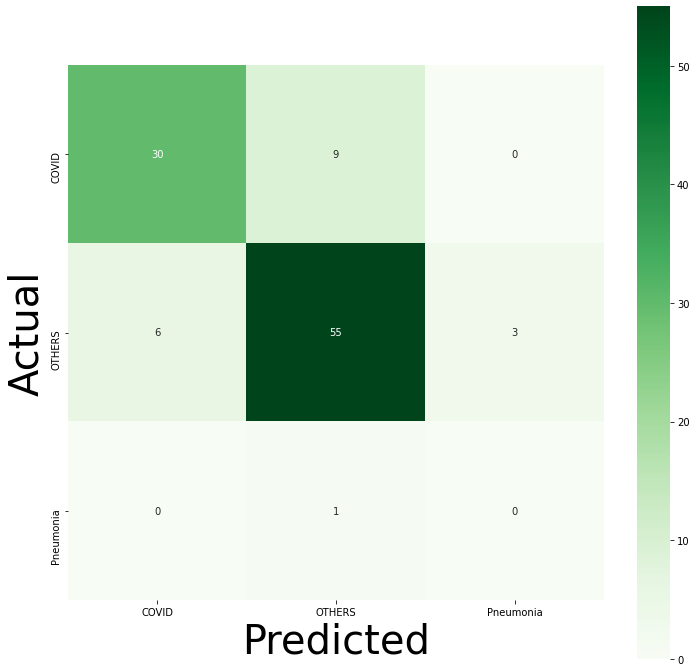

In [ ]:
Y_pred = model.predict(Final_X)
print(Y_train.shape)
#Y_pred= model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_train, axis=1)
#Y_true = np.argmax(Y_val, axis=1)
print(Y_pred.shape)
#Y_true=Y_val
print(Y_true.shape)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

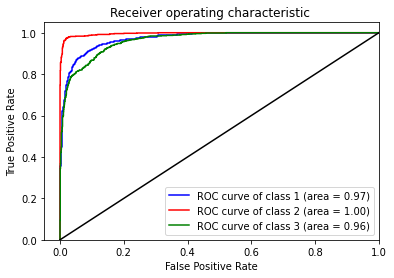

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
n_classes=3
# Compute ROC curve and ROC area for each class
# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_true[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

ValueError: ignored

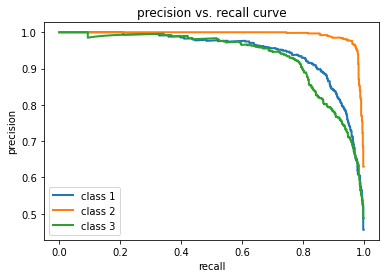

In [ ]:
# precision recall curve
precision = dict()
recall = dict()
pr_auc=dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_true[:, i],
                                                        Y_pred[:, i])
    #pr_auc[i] = auc(precision[i], recall[i])
    #print(auc(precision[i],recall[i]))
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i+1))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [ ]:
auc_score=auc(recall,precision)

ValueError: ignored

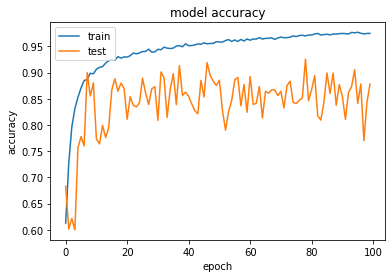

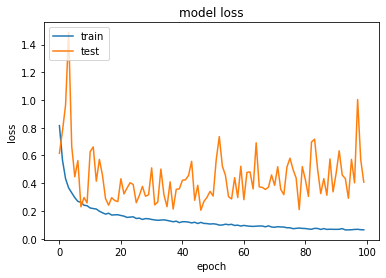

In [ ]:
# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(j)

0


In [ ]:
len(Trash_X)
Final_X[0]=np.delete(Final_X[0],Trash_X)
print(Final_X.shape)

ValueError: ignored

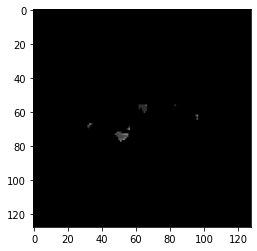

In [ ]:
plt.imshow(Final_X[8940].astype('uint8'))

In [ ]:
len(score)
x=np.arange(0,8942,1)
len(x)

8942

In [ ]:
Final_X.shape

(439517183,)

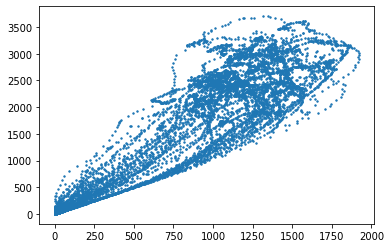

In [ ]:
plt.scatter(score_3,score_4,s=2)

In [ ]:
features=np.stack((score_1,score_2, score_3,score_4,score_5), axis=-1)

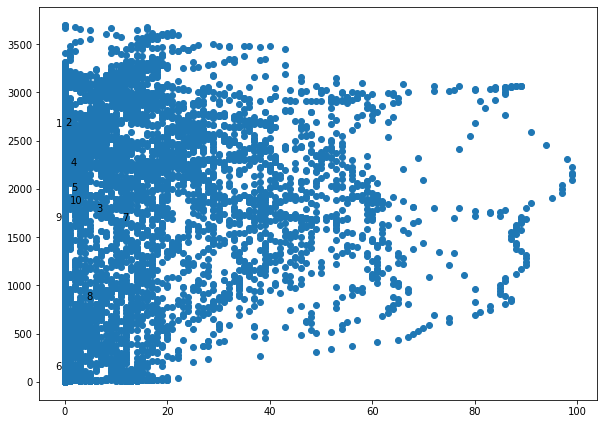

In [ ]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(features[:,1],features[:,3], label='True Position')

for label, x, y in zip(labels, features[:, 1], features[:, 3]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

In [ ]:
features

array([[0.000e+00, 0.000e+00, 1.025e+03, 2.596e+03, 2.612e+03],
       [0.000e+00, 2.000e+00, 1.087e+03, 2.604e+03, 2.728e+03],
       [0.000e+00, 8.000e+00, 1.242e+03, 1.718e+03, 1.718e+03],
       ...,
       [0.000e+00, 0.000e+00, 1.920e+02, 3.380e+02, 3.380e+02],
       [0.000e+00, 4.000e+00, 5.000e+01, 5.900e+01, 5.900e+01],
       [0.000e+00, 0.000e+00, 1.280e+02, 1.570e+02, 1.570e+02]])

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit_predict(features)

array([1, 1, 0, ..., 3, 5, 5])

In [ ]:
print(cluster.labels_)

[1 1 0 ... 3 5 5]


Text(0, 0.5, 'Frontier features')

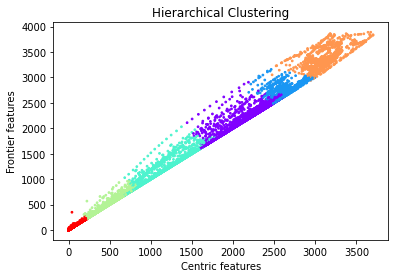

In [ ]:
plt.scatter(features[:,3],features[:,4],s=3, c=cluster.labels_, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('Centric features')
plt.ylabel('Frontier features')

In [ ]:
Final_X.shape

(8942, 128, 128, 3)

In [ ]:
Final_X=Final_X[1200:8942,:,:,:]

In [ ]:
Final_X.shape

(7742, 128, 128, 3)

In [ ]:
def plot_roc(model, X_test, y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    probabilities = model.predict_proba(np.array(X_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()